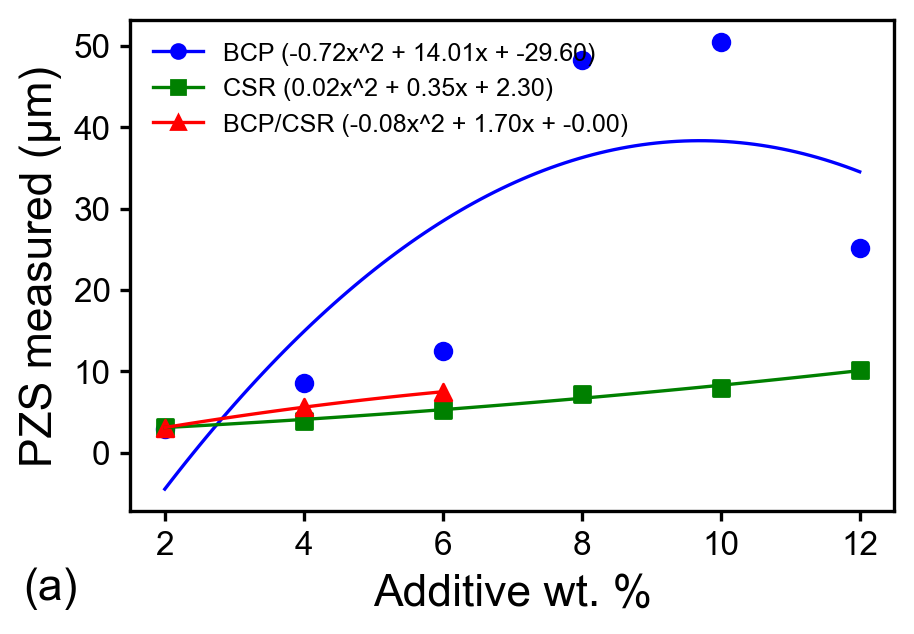

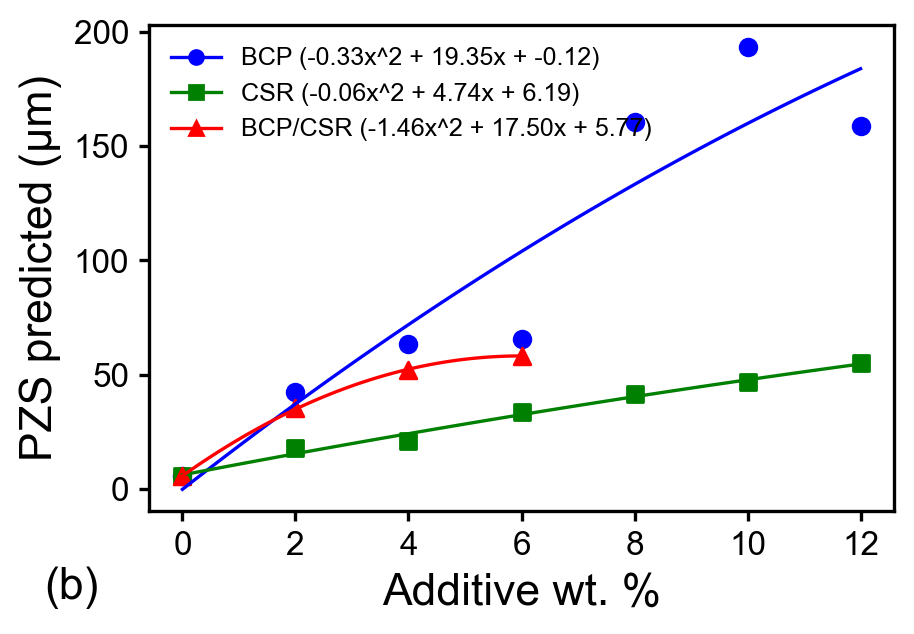

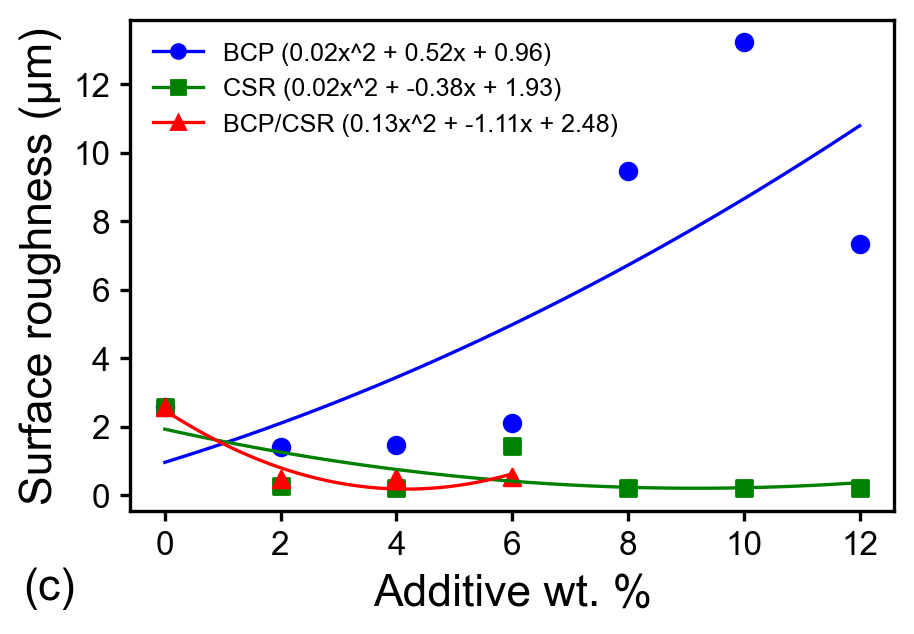

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.lines as mlines

rcParams['font.family'] = 'Arial'

# SPZS_measured style paramPZS_measureders
rcParams['axes.linewidth'] = 1.2
rcParams['lines.linewidth'] = 1.2
rcParams['grid.linewidth'] = 1.2
rcParams['xtick.major.width'] = 1.2
rcParams['ytick.major.width'] = 1.2

# New grid sPZS_measuredtings
rcParams['axes.grid'] = True
rcParams['grid.alpha'] = 0.5
rcParams['grid.color'] = 'gray'
rcParams['grid.linestyle'] = '--'
rcParams['grid.linewidth'] = 0.5

# Systems with BCP additive
PZS_measured_BCP = [2.9, 8.6, 12.5, 48.3, 50.5, 25.2]
PZS_predicted_BCP = [42.45, 63.46, 65.69, 160.56, 193.45, 158.85]
surface_roughness_BCP = [1.42, 1.48, 2.12, 9.46, 13.23, 7.338]

# Systems with CSR additive
PZS_measured_CSR = [3.2, 3.9, 5.2, 7.2, 7.9, 10.2]
PZS_predicted_CSR = [17.79, 20.90, 33.83, 41.51, 46.68, 54.97]
surface_roughness_CSR = [0.279, 0.224, 1.446, 0.208, 0.226, 0.204]

# Systems with both BCP and CSR additives
PZS_measured_BCP_CSR = [3.1, 5.6, 7.5]
PZS_predicted_BCP_CSR = [35.39, 51.97, 58.39]
surface_roughness_BCP_CSR = [0.480, 0.507, 0.519]

# # Function to extract actual values and std dev from the data lists
# def extract_values(data_list):
#     values, std_devs = zip(*data_list)
#     return list(values), list(std_devs)

# Percentage weight of the additive for BCP and CSR (since they have the same percentages)
percentages = [2, 4, 6, 8, 10, 12]

# Base polymer MEP
PZS_measured_MEP = [np.nan]
PZS_predicted_MEP = [5.62]
surface_roughness_MEP = [2.59]

# Percentage weight of the additive for BCP and CSR (since they have the same percentages)
percentages = [2, 4, 6, 8, 10, 12]

# Correcting the percentages for BCP_CSR combination
percentages_BCP_CSR = [2, 4, 6]

# Extending the BCP and CSR std dev lists with the base polymer MEP std dev data
PZS_measured_BCP_extended = PZS_measured_MEP + PZS_measured_BCP
PZS_measured_CSR_extended = PZS_measured_MEP + PZS_measured_CSR
PZS_measured_BCP_CSR_extended = PZS_measured_MEP[:len(percentages_BCP_CSR)] + PZS_measured_BCP_CSR

PZS_predicted_BCP_extended = PZS_predicted_MEP + PZS_predicted_BCP
PZS_predicted_CSR_extended = PZS_predicted_MEP + PZS_predicted_CSR
PZS_predicted_BCP_CSR_extended = PZS_predicted_MEP[:len(percentages_BCP_CSR)] + PZS_predicted_BCP_CSR

surface_roughness_BCP_extended = surface_roughness_MEP + surface_roughness_BCP
surface_roughness_CSR_extended = surface_roughness_MEP + surface_roughness_CSR
surface_roughness_BCP_CSR_extended = surface_roughness_MEP[:len(percentages_BCP_CSR)] + surface_roughness_BCP_CSR

percentages_extended = [0] + percentages
percentages_BCP_CSR_extended = [0] + percentages_BCP_CSR

# # Base polymer MEP values for extension
# PZS_measured_values_MEP, PZS_measured_MEP = extract_values(PZS_measured_MEP)
# PZS_predicted_values_MEP, PZS_predicted_MEP = extract_values(PZS_predicted_MEP)
# surface_roughness_values_MEP, surface_roughness_MEP = extract_values(surface_roughness_MEP)

# Define a helper function to format polynomial coefficients into a string
def format_poly(coeffs):
    terms = []
    degree = len(coeffs) - 1
    for i, coeff in enumerate(coeffs):
        if degree - i > 1:
            terms.append(f"{coeff:.2f}x^{degree - i}")
        elif degree - i == 1:
            terms.append(f"{coeff:.2f}x")
        else:
            terms.append(f"{coeff:.2f}")
    return " + ".join(terms)

# Define a helper function to format polynomial coefficients into a string
def format_poly(coeffs):
    terms = []
    degree = len(coeffs) - 1
    for i, coeff in enumerate(coeffs):
        if degree - i > 1:
            terms.append(f"{coeff:.2f}x^{degree - i}")
        elif degree - i == 1:
            terms.append(f"{coeff:.2f}x")
        else:
            terms.append(f"{coeff:.2f}")
    return " + ".join(terms)

# Updated function with equation labels and data points in the legend
def plot_individual_property_quadratic_fit(x_values, x_values_short, y_values_BCP, y_values_CSR, y_values_BCP_CSR, y_label, label):
    plt.figure(figsize=(4.4, 3), dpi=200)
    
    # Define colors for clarity
    color_BCP = 'blue'
    color_CSR = 'green'
    color_BCP_CSR = 'red'
    
    if y_values_BCP[0] is np.nan:
        x_values = x_values[1:]
        x_values_short = x_values_short[1:]
        y_values_BCP = y_values_BCP[1:]
        y_values_CSR = y_values_CSR[1:]
        y_values_BCP_CSR = y_values_BCP_CSR[1:]

        # Fit and plot BCP quadratic line
        coeffs_BCP = np.polyfit(x_values, y_values_BCP, deg=2)
        poly_BCP = np.poly1d(coeffs_BCP)
        x_line = np.linspace(min(x_values), max(x_values), 100)
        plt.plot(x_line, poly_BCP(x_line), color=color_BCP)
        bcp_points = plt.scatter(x_values, y_values_BCP, marker='o', color=color_BCP, label=None)
        
        # Fit and plot CSR quadratic line
        coeffs_CSR = np.polyfit(x_values, y_values_CSR, deg=2)
        poly_CSR = np.poly1d(coeffs_CSR)
        plt.plot(x_line, poly_CSR(x_line), color=color_CSR)
        csr_points = plt.scatter(x_values, y_values_CSR, marker='s', color=color_CSR, label=None)
        
        # Fit and plot BCP_CSR quadratic line
        coeffs_BCP_CSR = np.polyfit(x_values_short, y_values_BCP_CSR, deg=2)
        poly_BCP_CSR = np.poly1d(coeffs_BCP_CSR)
        x_line_BCP_CSR = np.linspace(min(x_values_short), max(x_values_short), 100)
        plt.plot(x_line_BCP_CSR, poly_BCP_CSR(x_line_BCP_CSR), color=color_BCP_CSR)
        bcp_csr_points = plt.scatter(x_values_short, y_values_BCP_CSR, marker='^', color=color_BCP_CSR, label=None)
    else:
        # Fit and plot BCP quadratic line
        coeffs_BCP = np.polyfit(x_values, y_values_BCP, deg=2)
        poly_BCP = np.poly1d(coeffs_BCP)
        x_line = np.linspace(min(x_values), max(x_values), 100)
        plt.plot(x_line, poly_BCP(x_line), color=color_BCP)
        bcp_points = plt.scatter(x_values, y_values_BCP, marker='o', color=color_BCP, label=None)
        
        # Fit and plot CSR quadratic line
        coeffs_CSR = np.polyfit(x_values, y_values_CSR, deg=2)
        poly_CSR = np.poly1d(coeffs_CSR)
        plt.plot(x_line, poly_CSR(x_line), color=color_CSR)
        csr_points = plt.scatter(x_values, y_values_CSR, marker='s', color=color_CSR, label=None)
        
        # Fit and plot BCP_CSR quadratic line
        coeffs_BCP_CSR = np.polyfit(x_values_short, y_values_BCP_CSR, deg=2)
        poly_BCP_CSR = np.poly1d(coeffs_BCP_CSR)
        x_line_BCP_CSR = np.linspace(min(x_values_short), max(x_values_short), 100)
        plt.plot(x_line_BCP_CSR, poly_BCP_CSR(x_line_BCP_CSR), color=color_BCP_CSR)
        bcp_csr_points = plt.scatter(x_values_short, y_values_BCP_CSR, marker='^', color=color_BCP_CSR, label=None)
    
    # Creating custom legend handles
    legend_handles = [
        mlines.Line2D([], [], color=color_BCP, marker='o', markersize=5, label=f'BCP ({format_poly(coeffs_BCP)})'),
        mlines.Line2D([], [], color=color_CSR, marker='s', markersize=5, label=f'CSR ({format_poly(coeffs_CSR)})'),
        mlines.Line2D([], [], color=color_BCP_CSR, marker='^', markersize=5, label=f'BCP/CSR ({format_poly(coeffs_BCP_CSR)})')
    ]
    
    # Add label (e.g., "(a)") on the bottom left of the figure
    plt.text(-0.14, -0.2, label, transform=plt.gca().transAxes, fontsize=16, va='bottom', ha='left')

    plt.xlabel('Additive wt. %', fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(handles=legend_handles, frameon=False, fontsize=9, loc='best')
    plt.grid(False)
    plt.tight_layout(pad=0.1)
    plt.show()

# Example of calling the updated plotting function for one of the properties
plot_individual_property_quadratic_fit(
    percentages_extended, percentages_BCP_CSR_extended, PZS_measured_BCP_extended,
    PZS_measured_CSR_extended,
    PZS_measured_BCP_CSR_extended, 'PZS measured (µm)', label='(a)')

# Tensile Strength ($\sigma_m$ [MPa])
plot_individual_property_quadratic_fit(
    percentages_extended, percentages_BCP_CSR_extended, PZS_predicted_BCP_extended,
    PZS_predicted_CSR_extended,
    PZS_predicted_BCP_CSR_extended, 'PZS predicted (µm)', label='(b)')

# Elongation at Break ($\epsilon_m$ [%])
plot_individual_property_quadratic_fit(
    percentages_extended, percentages_BCP_CSR_extended, surface_roughness_BCP_extended,
    surface_roughness_CSR_extended,
    surface_roughness_BCP_CSR_extended, 'Surface roughness (µm)', label='(c)')
